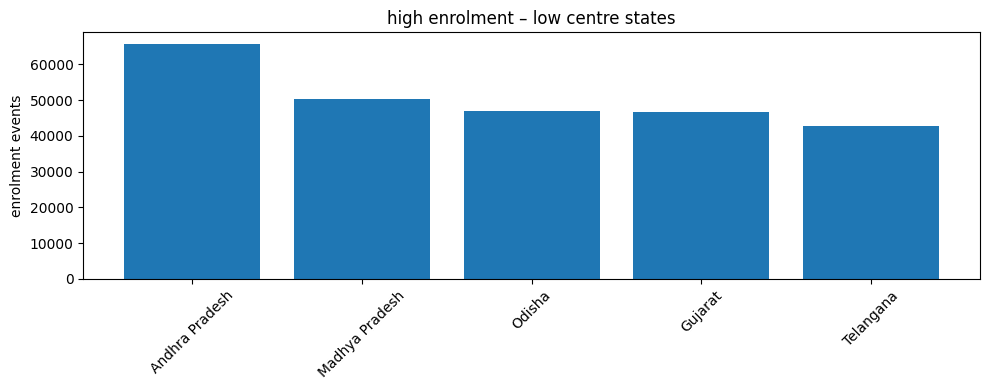

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
enrolments=enrolment_df.groupby("state").size().reset_index(name="enrolment_events")


centres=pd.read_csv("../sql/data/Aadhar.csv")
centres=centres.rename(columns={"State":"state","No. of centres":"centres"})
centres["centres"]=pd.to_numeric(centres["centres"],errors="coerce")


df=enrolments.merge(centres,on="state",how="inner")


df=df.sort_values("enrolment_events",ascending=False).head(10)


df=df.sort_values("centres").head(len(df)//2)


df=df.sort_values("enrolment_events",ascending=False)

# plot
plt.figure(figsize=(10,4))
plt.bar(df["state"],df["enrolment_events"])
plt.xticks(rotation=45)
plt.ylabel("enrolment events")
plt.title("high enrolment – low centre states")
plt.tight_layout()
plt.show()
